# <font color='red'>BackPropagation</font>

**There will be some functions that start with the word "grader" ex: grader_sigmoid(), grader_forwardprop(), grader_backprop() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

## <font color='red'>Loading data </font>

In [546]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import decimal 

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

# <font color='red'>Task 1: Implementing backpropagation and Gradient checking </font>

<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

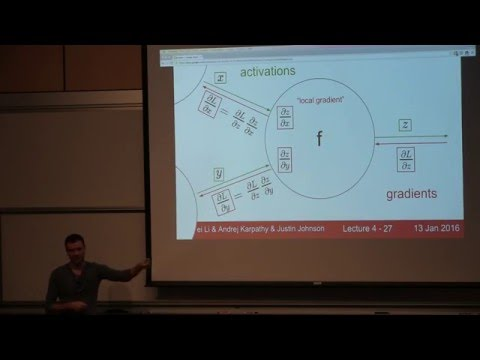

In [547]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")


*  <b>Write two functions<br>
    *  Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

    <pre>
    <font color='green'>
def forward_propagation(X, y, W):
        <font color='grey'>
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph, <br>         ..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # write code to compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig,dl variables
        </font>
        return (dictionary, which you might need to use for back propagation)
        <font color='grey'>
        </font>
</font>
</pre>
    *  <b>Backward propagation</b>(Write your code in<font color='blue'> def backward_propagation()</b></font>)
    </b>
    <pre>
    <font color='green'>
    def backward_propagation(L, W,dictionary):
        <font color='grey'>
        # L: the loss we calculated for the current point
        # dictionary: the outputs of the forward_propagation() function
        # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
        # Hint: you can use dict type to store the required variables 
        # return dW, dW is a dictionary with gradients of all the weights
        </font>
        return dW
        </font>
</font>
</pre>

 ## <font color='red'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 3 type of optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* Initilze the 9 weights from normal distribution with mean=0 and std=0.01

**Check below video and <a href='https://cs231n.github.io/neural-networks-3/'>this</a> blog**

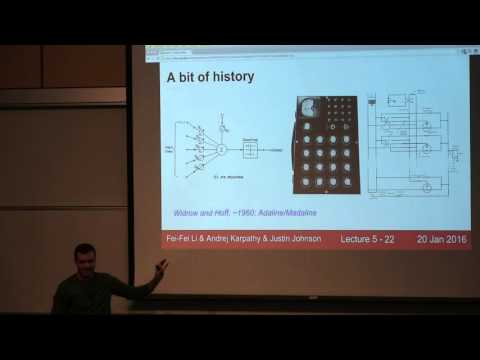

In [548]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

<br>
<br>
<br>

# <font color='red'>Task 1 </font>

## <font color='blue'>Forward propagation </font>

In [549]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
    
    sig = 1 /(1+ (np.exp(-1*z)))
    
    return sig

    
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # write code to compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig variables
        
        dict_res = {}
        
        exp = np.exp(( ( (w[0]*x[0]) + (w[1]*x[1]) ) * ( (w[0]*x[0]) + (w[1]*x[1]) ) ) + w[5])
        tanh = np.tanh(exp + w[6])
        sig = sigmoid(((np.sin(w[2]*x[2]))* ( (w[3]*x[3]) + (w[4]*x[4]) )) + w[7])
        
        y_ = (tanh + (sig*w[8]))
        
        loss = (y-y_)**2

        dy_pr = -2*(y-y_)
        
        dict_res['loss'] =    loss
        dict_res['exp'] =     exp
        dict_res['tanh'] =    tanh
        dict_res['sigmoid'] = sig
        dict_res['dy_pr'] =   dy_pr
        
        return (dict_res)

<font color='cyan'>Grader function - 1</font>

In [550]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='cyan'>Grader function - 2 </font>

In [551]:
def grader_forwardprop(data):
    dl = (data['dy_pr']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

## <font color='blue'>Backward propagation</font>

In [552]:
def backward_propagation(L,W,dict_res):
    '''In this function, we will compute the backward propagation '''
    # L: the loss we calculated for the current point
    # dictionary: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    # dw9 = # in dw9 compute derivative of L w.r.to w9           
    
    dict_grad = {}
    
    dw7 = dict_res['dy_pr'] * (1- (dict_res['tanh']**2))
    
    dw6 = dw7 * (dict_res['exp'])
    
    dw9 = dict_res['dy_pr'] * dict_res['sigmoid']
    
    getcontext().prec = 17
    getcontext().rounding = getattr(decimal, 'ROUND_DOWN')
    
    dw8 = float((Decimal(dict_res['dy_pr']) * Decimal(dict_res['sigmoid']) * (Decimal(1) - Decimal(dict_res['sigmoid']) ) * Decimal(W[7])))
    
    dw3 =  ( (np.cos( L[2] * W[2] ))  * dw8 * (( W[3] * L[3] ) + ( W[4] * L[4] )) * L[2]  )
    
    dw4 = dw8  * L[3] * np.sin(W[2]*L[2]) 
    
    dw5 = dw8  * L[4] * np.sin(W[2]*L[2])
    
#     ROUNDING_MODES = [ 
#     'ROUND_CEILING', 
#     'ROUND_DOWN',
#     'ROUND_FLOOR', 
#     'ROUND_HALF_DOWN', 
#     'ROUND_HALF_EVEN',
#     'ROUND_HALF_UP',
#     'ROUND_UP',
#     'ROUND_05UP',
#     ]
    
    getcontext().prec = 17
    getcontext().rounding = getattr(decimal, 'ROUND_UP')
    
    dw1 = float(format(Decimal(dw6)  * ( Decimal(2) *( ( Decimal(W[0]) * Decimal(L[0]) ) + ( Decimal(W[1]) * Decimal(L[1])))) * Decimal(L[0]),'.17f'))
    
    getcontext().prec = 17
    getcontext().rounding = getattr(decimal, 'ROUND_DOWN')
    
    dw2 =float(format(Decimal(dw6)  * ( Decimal(2) *( ( Decimal(W[0]) * Decimal(L[0]) ) + ( Decimal(W[1]) * Decimal(L[1])))) * Decimal(L[1])))

    
    dict_grad['dw1'] = dw1
    dict_grad['dw2'] = dw2
    dict_grad['dw3'] = dw3
    dict_grad['dw4'] = dw4
    dict_grad['dw5'] = dw5
    dict_grad['dw6'] = dw6
    dict_grad['dw7'] = dw7
    dict_grad['dw8'] = dw8
    dict_grad['dw9'] = dw9
    
    return dict_grad
    

    # return dW, dW is a dictionary with gradients of all the weights

<font color='cyan'>Grader function - 3 </font>

In [553]:
def grader_backprop(data):
    dw1=(data['dw1']==-0.22973323498702003)
    dw2=(data['dw2']==-0.021407614717752925)
    dw3=(data['dw3']==-0.005625405580266319)
    dw4=(data['dw4']==-0.004657941222712423)
    dw5=(data['dw5']==-0.0010077228498574246)  
    dw6=(data['dw6']==-0.6334751873437471)     
    dw7=(data['dw7']==-0.561941842854033)
    dw8=(data['dw8']==-0.04806288407316516)
    dw9=(data['dw9']==-1.0181044360187037)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
d1=backward_propagation(X[0],w,d1)
grader_backprop(d1)

True

## <font color='blue'> Implement gradient checking</font>

In [554]:
#W = initilize_randomly
W = np.random.rand(9)

def gradient_checking(x,y, W):
    
    # compute the L value using forward_propagation()
    f_p =forward_propagation(x,y,W)
   
    # compute the gradients of W using backword_propagation()
    b_p = backward_propagation(X[0],W,f_p)
    
    approx_gradients = []
    
    for wi in range(len(W)):
        
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi
        
        W_org = W.copy()
        
        e = 0.0001
        
        W_org[wi] =  W_org[wi] + e

        f_p =forward_propagation(x,y,W_org)
        L_add = f_p['loss']
        
        
        W_org = W.copy()

        W_org[wi] =  W_org[wi] - e

        f_p =forward_propagation(x,y,W_org)
        L_minus = f_p['loss']

        w_approx = (L_add - L_minus)/(2*e)
        
        approx_gradients.append(w_approx)
        
       

    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with gradient_check formula
    gradient_check = []

    for i , j in zip (b_p.values(),approx_gradients):
        gradient_check.append( (i-j)/(i+j) )
        
    return gradient_check

gc = gradient_checking(X[0],y[0],W)

for g in gc:
    if g < 0.0000001:
        print("Gradient is Correct")
    else:
        print("Gradient is Incorrect")

Gradient is Correct
Gradient is Correct
Gradient is Correct
Gradient is Correct
Gradient is Correct
Gradient is Correct
Gradient is Correct
Gradient is Correct
Gradient is Correct


# <font color='red'>Task 2: Optimizers

###<font color='blue'>Algorithm with Vanilla update of weights</font>

In [555]:
mu, sigma = 0, 0.01 
W = np.random.normal(mu, sigma, 9)

epoch = []
loss = []
for i in range(100):
    epoch.append(i+1)
    
    for l,m in zip(X,y):

        d1=forward_propagation(l,m,W)
        f_p = d1.copy()
        d1=backward_propagation(l,W,d1)
        grads = list(d1.values())

        for k in range(len(grads)):
            W[k] = W[k] - ( (0.0001) * grads[k] )

    loss.append(f_p['loss'])
#             using the functions forward_propagation() and backword_propagation() compute the gradients of weights
#             update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
                

                
                

<font color='blue'>Plot between epochs and loss</font>

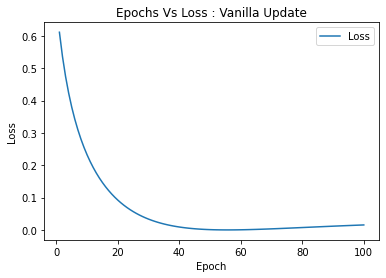

In [556]:

import matplotlib.pyplot as plt

plt.plot(epoch,loss, label='Loss')
plt.title('Epochs Vs Loss : Vanilla Update')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


###<font color='blue'>Algorithm with Momentum update of weights</font>

In [557]:
#https://cs231n.github.io/neural-networks-3/

mu, sigma = 0, 0.01 
W = np.random.normal(mu, sigma, 9)
v = [0,0,0,0,0,0,0,0,0]

epoch = []
loss = []
for i in range(100):
    epoch.append(i+1)
    
    for l,m in zip(X,y):

        d1=forward_propagation(l,m,W)
        f_p = d1.copy()
        d1=backward_propagation(l,W,d1)
        grads = list(d1.values())

        for k in range(len(grads)):
            v[k] = (0.55* v[k]) + (0.0001 * grads[k] )
            W[k] = W[k] -  v[k]

    loss.append(f_p['loss'])

<font color='blue'>Plot between epochs and loss</font>

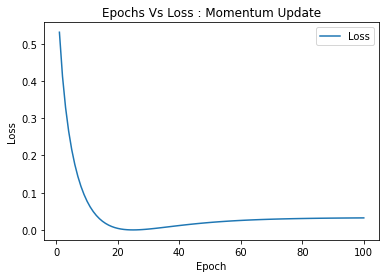

In [558]:
import matplotlib.pyplot as plt

plt.plot(epoch,loss, label='Loss')
plt.title('Epochs Vs Loss : Momentum Update')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

###<font color='blue'>Algorithm with Adam update of weights</font>

In [559]:
#https://cs231n.github.io/neural-networks-3/

mu, sigma = 0, 0.01 
W = np.random.normal(mu, sigma, 9)
vt = [0,0,0,0,0,0,0,0,0]
mt = [0,0,0,0,0,0,0,0,0]
vt_hat = [0,0,0,0,0,0,0,0,0]
mt_hat = [0,0,0,0,0,0,0,0,0]

b1 = 0.9
b2 = 0.99
a = 0.0001
e = 0.00001

epoch = []
loss = []
for i in range(100):
    epoch.append(i+1)
    
    for l,m in zip(X,y):

        d1=forward_propagation(l,m,W)
        f_p = d1.copy()
        d1=backward_propagation(l,W,d1)
        grads = list(d1.values())

        for k in range(len(grads)):
            mt[k] = b1*mt[k] + ( (1-b1) * grads[k] )
            vt[k] = b2*vt[k] + ( (1-b2) * grads[k]**2 )
            
            mt_hat[k] = mt[k]/(1 - b1**(i+1))
            vt_hat[k] = vt[k] /(1 - b2**(i+1))
            
            W[k] = W[k] - ( a * ( mt_hat[k] / ( np.sqrt(vt_hat[k]) + e )  ))

    loss.append(f_p['loss'])

<font color='blue'>Plot between epochs and loss</font>

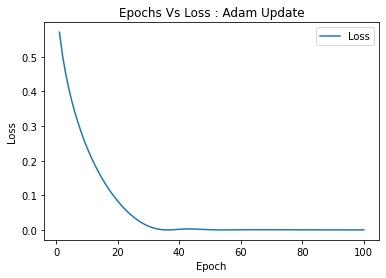

In [560]:
import matplotlib.pyplot as plt

plt.plot(epoch,loss, label='Loss')
plt.title('Epochs Vs Loss : Adam Update')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

<font color='blue'>Comparision plot between epochs and loss with different optimizers</font>

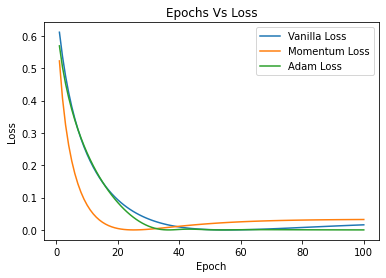

In [561]:
mu, sigma = 0, 0.01 
W = np.random.normal(mu, sigma, 9)

epoch = []
loss = []
for i in range(100):
    epoch.append(i+1)
    
    for l,m in zip(X,y):

        d1=forward_propagation(l,m,W)
        f_p = d1.copy()
        d1=backward_propagation(l,W,d1)
        grads = list(d1.values())

        for k in range(len(grads)):
            W[k] = W[k] - ( (0.0001) * grads[k] )

    loss.append(f_p['loss'])
    
plt.plot(epoch,loss, label='Vanilla Loss')
plt.title('Epochs Vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


mu, sigma = 0, 0.01 
W = np.random.normal(mu, sigma, 9)
v = [0,0,0,0,0,0,0,0,0]

epoch = []
loss = []
for i in range(100):
    epoch.append(i+1)
    
    for l,m in zip(X,y):

        d1=forward_propagation(l,m,W)
        f_p = d1.copy()
        d1=backward_propagation(l,W,d1)
        grads = list(d1.values())

        for k in range(len(grads)):
            v[k] = (0.55* v[k]) + (0.0001 * grads[k] )
            W[k] = W[k] -  v[k]

    loss.append(f_p['loss'])

plt.plot(epoch,loss, label='Momentum Loss')
plt.legend()

mu, sigma = 0, 0.01 
W = np.random.normal(mu, sigma, 9)
vt = [0,0,0,0,0,0,0,0,0]
mt = [0,0,0,0,0,0,0,0,0]
vt_hat = [0,0,0,0,0,0,0,0,0]
mt_hat = [0,0,0,0,0,0,0,0,0]

b1 = 0.9
b2 = 0.99
a = 0.0001
e = 0.00001

epoch = []
loss = []
for i in range(100):
    epoch.append(i+1)
    
    for l,m in zip(X,y):

        d1=forward_propagation(l,m,W)
        f_p = d1.copy()
        d1=backward_propagation(l,W,d1)
        grads = list(d1.values())

        for k in range(len(grads)):
            mt[k] = b1*mt[k] + ( (1-b1) * grads[k] )
            vt[k] = b2*vt[k] + ( (1-b2) * grads[k]**2 )
            
            mt_hat[k] = mt[k]/(1 - b1**(i+1))
            vt_hat[k] = vt[k] /(1 - b2**(i+1))
            
            W[k] = W[k] - ( a * ( mt_hat[k] / ( np.sqrt(vt_hat[k]) + e )  ))

    loss.append(f_p['loss'])
    
plt.plot(epoch,loss, label='Adam Loss')
plt.legend()
plt.show()

Momentum update converges fastest in the lowest epochs followed by Vanilla update.

All the three updates reach similar lowest loss.